In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as manimation

import scipy.linalg

In [2]:
random_state = 1

n_pts_sphere = 60
n_pts_random = 60
dt = 5e-2

25
25


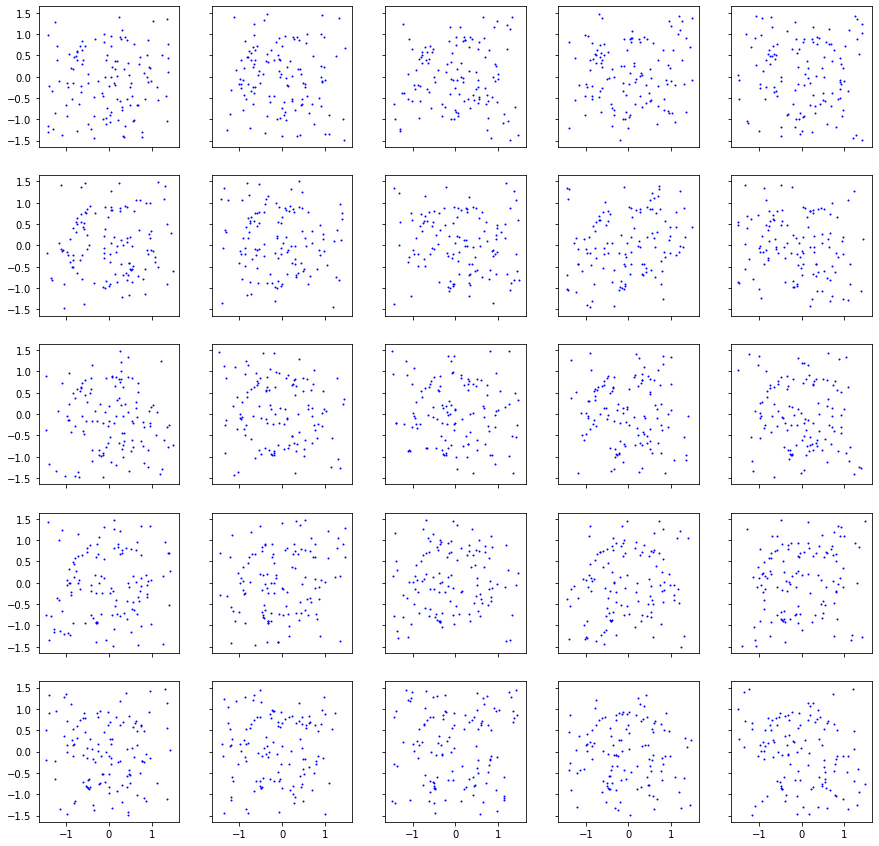

In [3]:
# generate test data
def plot_sphere(U, points, ax):
    if U is None:
        points_ = points
    else:
        points_ = points @ U
    
    if ax is None:
        return points_
    else:
        ax.scatter(*points_[:,[0,1]].T, s=1, c='blue')
    return points_

def plot_uniform(points, ax):
    ax.scatter(*points[:,[0,1]].T, s=1, c='blue')
    
def sample_U(rng_):
    U = rng_.normal(loc=0,scale=1,size=(3,3))
    us,_,vts = np.linalg.svd(np.identity(3)+dt*U)
    U = us @ vts
    return U#scipy.linalg.fractional_matrix_power(U, dt).real

rng = np.random.default_rng(random_state)
points = rng.normal(loc=0, scale=1, size=(n_pts_sphere,3))
points = points / np.linalg.norm(points, axis=1).reshape(-1,1)

U = sample_U(rng)

x_data = []
y_data = []

fig,ax = plt.subplots(5,5,figsize=(15,15), sharex=True, sharey=True)
for k1 in range(5):
    for k2 in range(5):
        ax_k = ax[k1, k2]
        x_data.append(points)
        points = plot_sphere(U, points, ax_k)
        y_data.append(points)
        plot_uniform(rng.uniform(low=-1.5, high=1.5, size=(n_pts_random,2)), ax_k)

        ax_k.set_aspect(1)
        
        if k1 % 2 == 0:
            U = sample_U(rng)

print(len(x_data))
print(len(y_data))

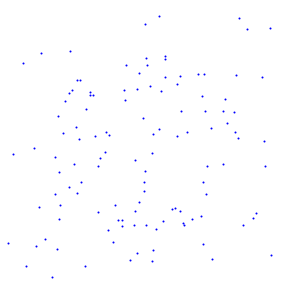

In [5]:
NTIME = 1000
DPI = 100

rng = np.random.default_rng(random_state)

U = sample_U(rng)

points = rng.normal(loc=0, scale=1, size=(n_pts_sphere,3))
points = points / np.linalg.norm(points, axis=1).reshape(-1,1)

all_points = []
for k in range(NTIME):
    points = plot_sphere(U, points, ax=None)
    all_points.append(points)
    
    if rng.uniform(0,1) < 1e-1:
        U = sample_U(rng)

fig,ax = plt.subplots(1,1,figsize=(5,5))

def update_img(i):
    ax.clear()
    
    plot_sphere(U=None, points=all_points[i], ax=ax)
    plot_uniform(rng.uniform(low=-1.5, high=1.5, size=(n_pts_random,2)), ax)
    
    ax.set_xlim([-1.5,1.5])
    ax.set_ylim([-1.5,1.5])
    
    ax.axis("off")
    return fig
        
if True:
    update_img(40)
else:
    ani = manimation.FuncAnimation(fig,update_img,frames=range(NTIME))
    writer = manimation.writers['ffmpeg'](fps=20)
    ani.save('random_sphere.mp4',writer=writer,dpi=DPI)